**Limiarização adaptativa**

Usada quando existe diferença na iluminação na imagem.

Calcular limiares de acordo com a imagem. Para cada segmento da imagem é calculado um limiar baseado na vizinhança dos pixels.

Função do openCv: adaptiveThreshold()
- ADAPTIVE_THRESH_MEAN_C: Valor do limiar é a média da área da vizinhança;
- ADAPTIVE_THRESH_GAUSSIAN_C: O valor do limiar é a soma ponderada dos valores da vizinhança onde os pesos são uma janela gaussiana.

O parâmetro C: quanto maior o valor, menor será o ruído.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/gdrive')

!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

Mounted at /content/gdrive


In [2]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

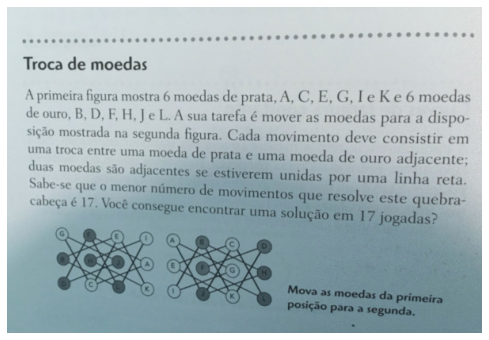

In [3]:
img = cv2.imread('/content/imagens/livro-texto.jpg')
mostrar_imagem(img)

175.0


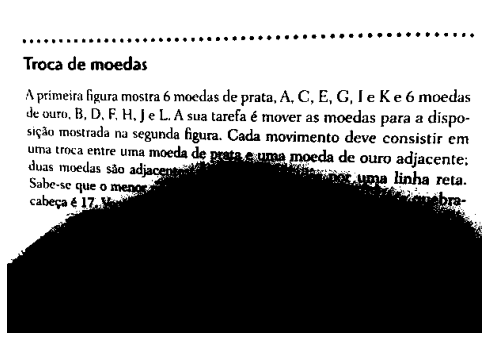

In [5]:
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
valor, otsu = cv2.threshold(imgCinza, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(valor)
mostrar_imagem(otsu)

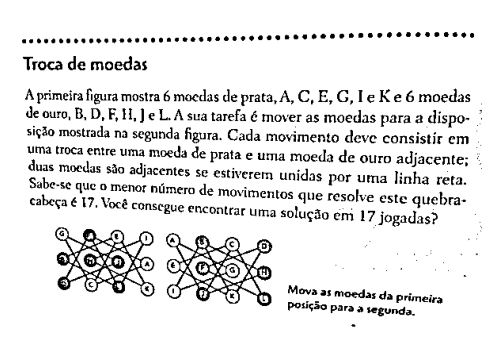

In [7]:
adpt_media = cv2.adaptiveThreshold(imgCinza, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11 # Tamanho da vizinhança dos pixels,, limiar calculado de 11 em 11 pixels
                                   , 9 # Constante que será subtraída da média, quanto menor seu valor, maior será o contranste da região
                                   )
mostrar_imagem(adpt_media)

**Limiarização adaptativa Gaussiana**

Usa uma matriz 3 x 3 pixels.

Cálculo entre a imagem e a matriz Gaussiana.

M = 

|1 2 1|

|2 4 2|

|1 2 1|

Baseado na função Gaussiana, a distribuição normal.

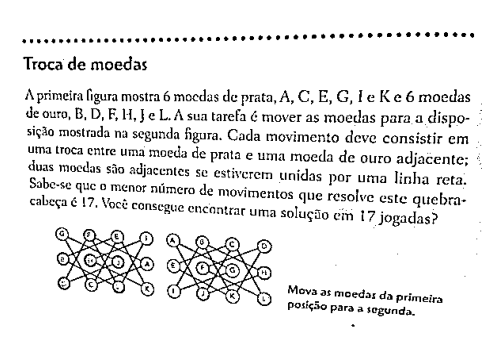

In [10]:
adapt_gauss = cv2.adaptiveThreshold(imgCinza, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11, 9 # Quanto maior, mais ruído será removido da imagem
                                    )
mostrar_imagem(adapt_gauss)

In [15]:
def limiarizacao_adaptativa(img, limiar = 140, block_size = 11, C = 9):
  _, limiar_global = cv2.threshold(img, limiar, 255, cv2.THRESH_BINARY)
  adpt_media = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
  adapt_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,block_size, C)

  imagens = [img, limiar_global, adpt_media, adapt_gauss]
  titulos = ['Imagem original', 'Limiarização global', 'Limiarização adaptativa - média', 'Limiarização adaptativa - Gaussiana']

  fig = plt.gcf()
  fig.set_size_inches(18, 12)

  for i in range(len(imagens)):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title(titulos[i])
    plt.xticks([])
    plt.yticks([])

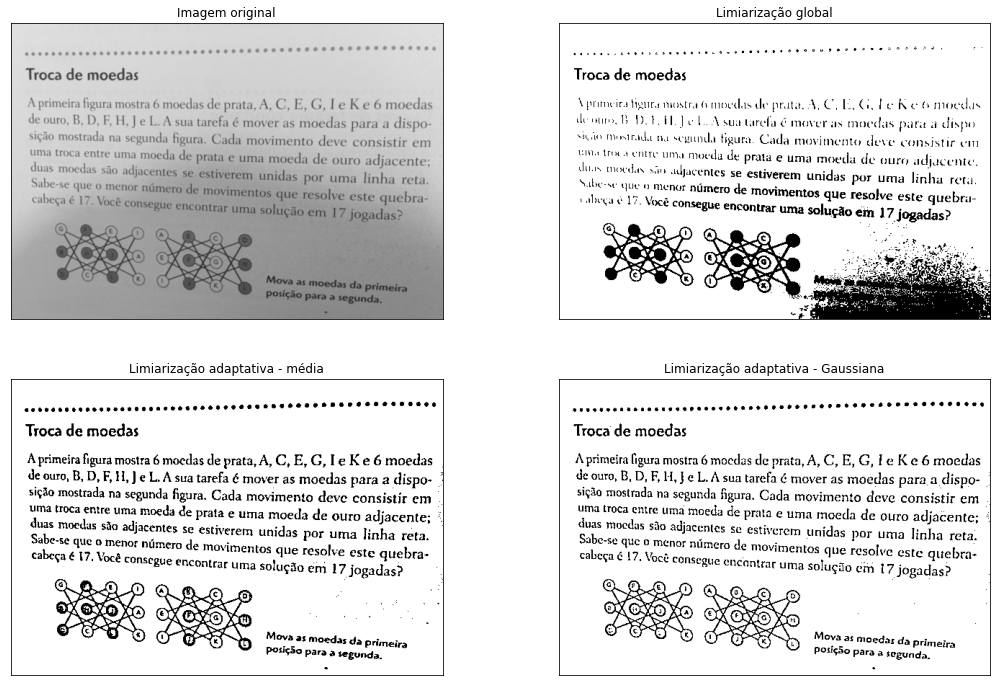

In [16]:
limiarizacao_adaptativa(imgCinza)

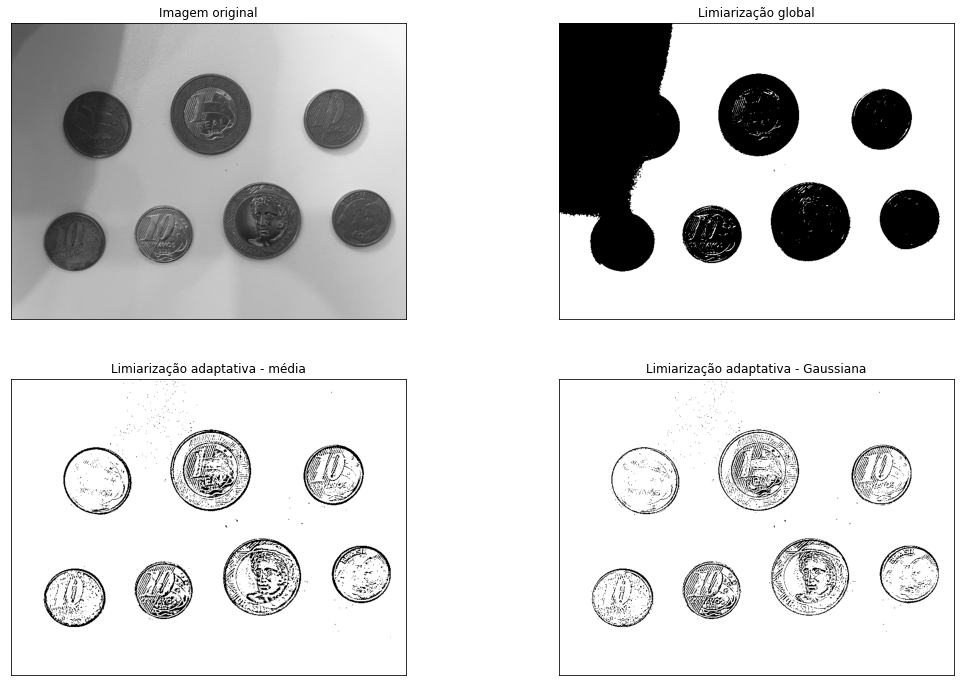

In [18]:
img = cv2.imread('/content/imagens/moedas02.jpg')
imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
limiarizacao_adaptativa(imgCinza)

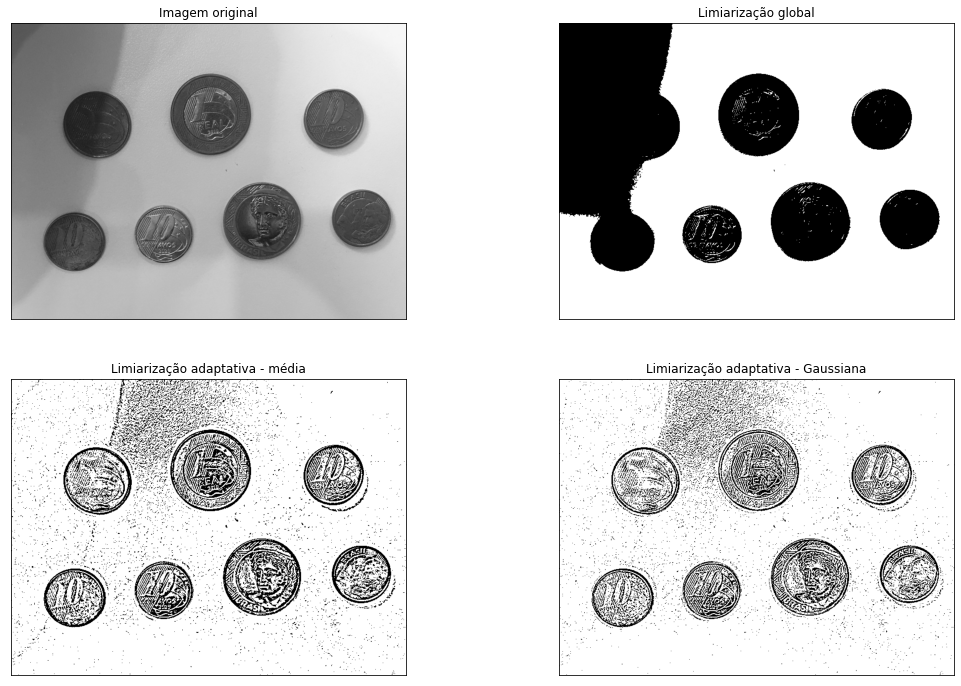

In [19]:
limiarizacao_adaptativa(imgCinza, C = 3)

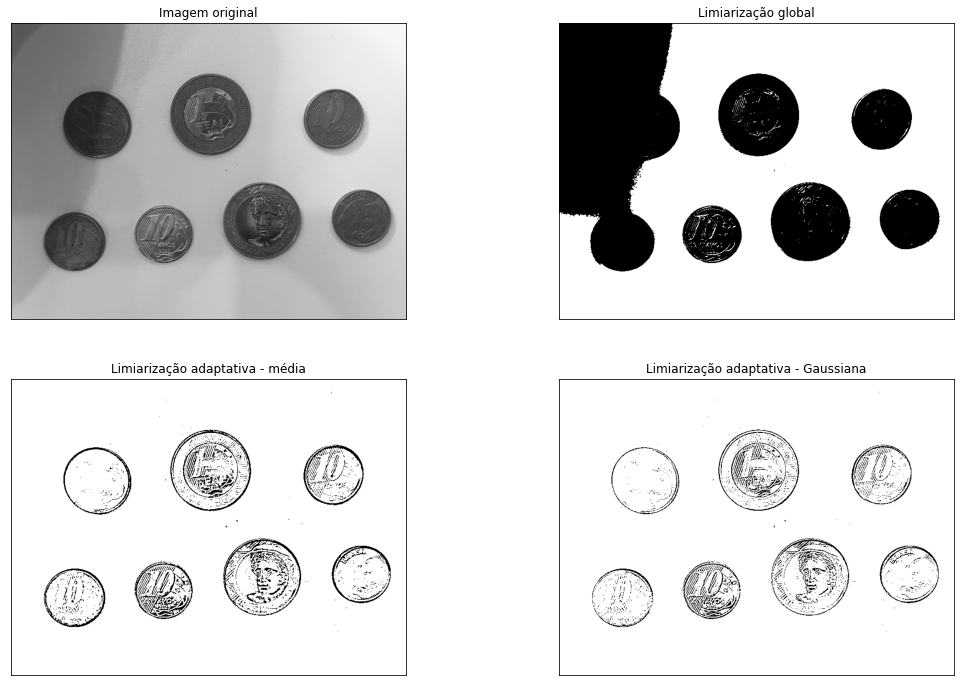

In [20]:
limiarizacao_adaptativa(imgCinza, C = 12)

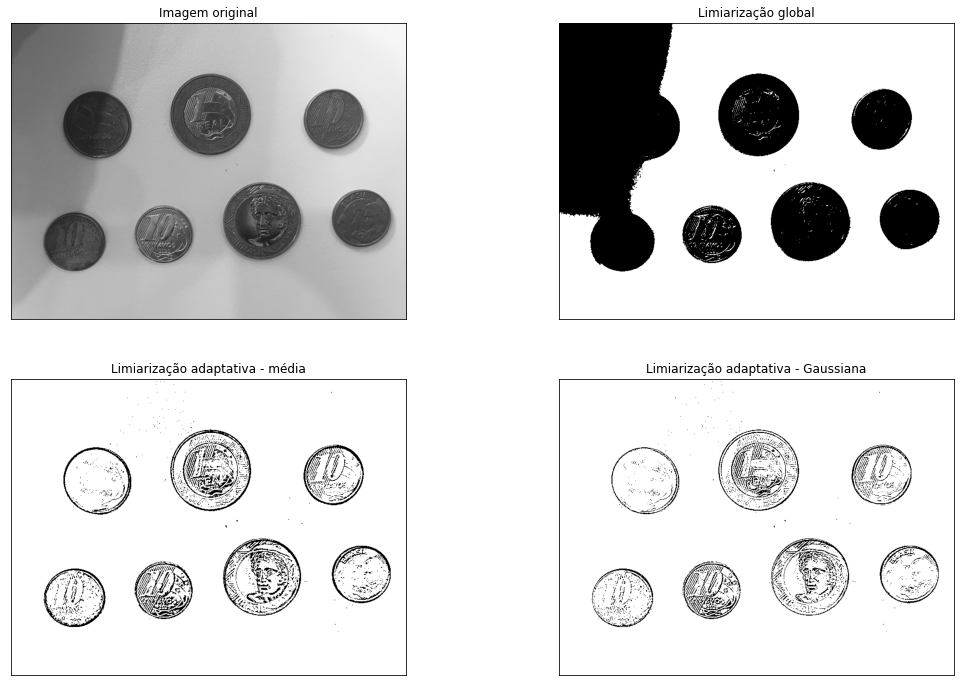

In [21]:
limiarizacao_adaptativa(imgCinza, C = 10)